# Continuous Wavelet Transform

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

Based on "Wavelet" Signals. A wavelet signal has the form

<center>

$ \psi_{\tau,s} (t)  = \frac{1}{\sqrt{s}} \psi ( \frac{t-\tau}{s} )$

</center>

Here $\tau$ and $s$ are "shift" and "scale" respectively.

$\psi(t)$ is called the "mother wavelet".

In [3]:
T = 100
T_points = 1000

delta_T = T/T_points

t = np.linspace(0,T,T_points)

## Morlet Wavelet

A commonly used mother wavelet:

<center>

$ \psi(t) = e^{jw_0t}e^{-\frac{t^2}{2}}$

</center>

In [4]:
def morlet(t, w0=1):
    return np.exp(1j*w0*t)*np.exp(-0.5*t*t)

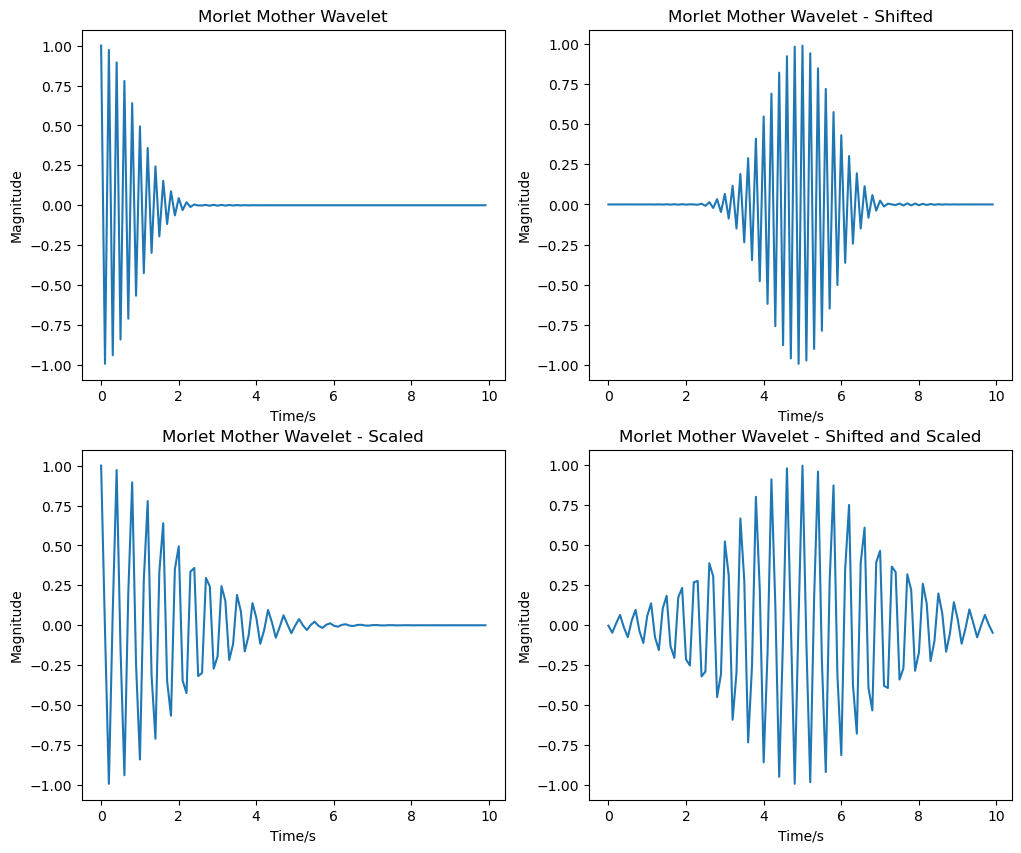

In [5]:
PLOT_LIM = 100

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title("Morlet Mother Wavelet")
plt.plot(t[0:PLOT_LIM], np.real(morlet(t, w0=32))[0:PLOT_LIM])
plt.xlabel("Time/s")
plt.ylabel("Magnitude")

plt.subplot(2,2,2)
plt.title("Morlet Mother Wavelet - Shifted")
plt.plot(t[0:PLOT_LIM], np.real(morlet(t-5, w0=32))[0:PLOT_LIM])
plt.xlabel("Time/s")
plt.ylabel("Magnitude")

plt.subplot(2,2,3)
plt.title("Morlet Mother Wavelet - Scaled")
plt.plot(t[0:PLOT_LIM], np.real(morlet(t/2, w0=32))[0:PLOT_LIM])
plt.xlabel("Time/s")
plt.ylabel("Magnitude")

plt.subplot(2,2,4)
plt.title("Morlet Mother Wavelet - Shifted and Scaled")
plt.plot(t[0:PLOT_LIM], np.real(morlet((t-5)/2, w0=32))[0:PLOT_LIM])
plt.xlabel("Time/s")
plt.ylabel("Magnitude")

plt.show()

## Multitone Stationary Signal

In [6]:
f1 = 4
f2 = 1
f3 = 0.4

x_t = np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+np.sin(2*np.pi*f3*t)

print(f'w1 = {2*np.pi*f1}')
print(f'w2 = {2*np.pi*f2}')
print(f'w3 = {2*np.pi*f3}')

w1 = 25.132741228718345
w2 = 6.283185307179586
w3 = 2.5132741228718345


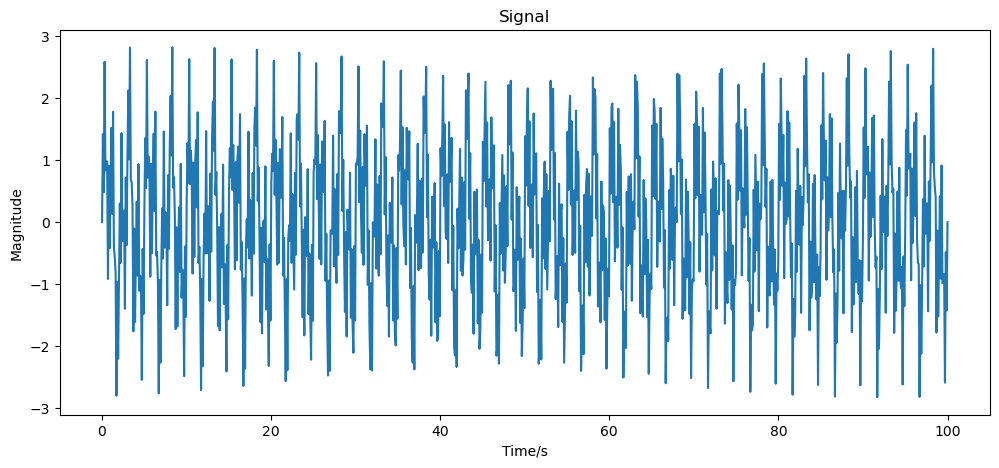

In [7]:
plt.figure(figsize=(12,5))
plt.plot(t, x_t)
plt.xlabel("Time/s")
plt.ylabel("Magnitude")
plt.title("Signal")
plt.show()

### Generate CWT Map

In [8]:
tau_points = 100

s_max = 16
s_points = 64

tau = np.linspace(0,T,tau_points)
s = np.linspace(1,s_max, s_points)

In [9]:
tau_,s_,t_ = np.meshgrid(tau,s,t,indexing='ij')
print(s_.shape)

(100, 64, 1000)


In [10]:
w0 = 32
wav = morlet((t_ - tau_)/s_, w0=w0)
Sxx = np.trapz(x_t*np.conjugate(wav), axis=2)/np.sqrt(s_[:,:,0])
print(Sxx.shape)


(100, 64)


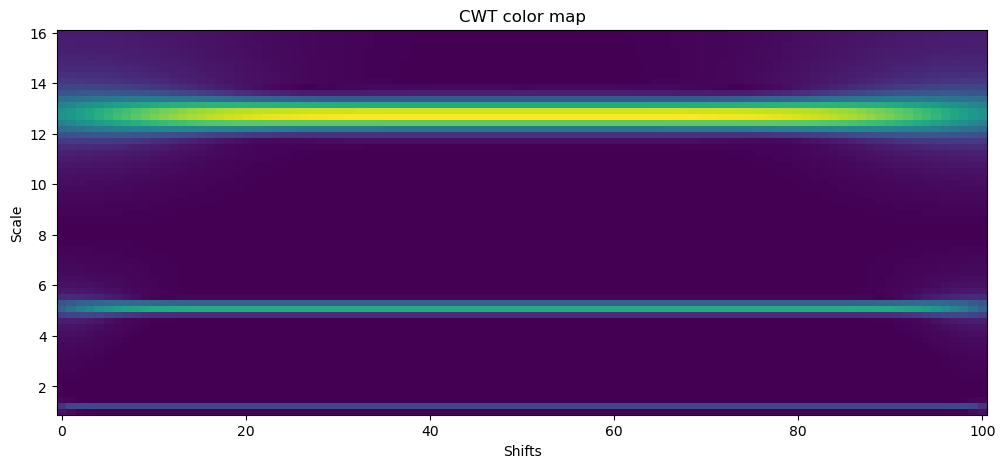

In [11]:
plt.figure(figsize=(12,5))
plt.title("CWT color map")
plt.pcolormesh(tau, s, np.abs(Sxx.T))
plt.xlabel("Shifts")
plt.ylabel("Scale")
plt.show()

In [12]:
print(f'Scale of f1 = {w0/(2*np.pi*f1)}')
print(f'Scale of f2 = {w0/(2*np.pi*f2)}')
print(f'Scale of f3 = {w0/(2*np.pi*f3)}')

Scale of f1 = 1.2732395447351628
Scale of f2 = 5.092958178940651
Scale of f3 = 12.732395447351628


Lower scales (Higher Frequencies) have better scale resolution ==> Poorer Frequency resolution

Higher scales (Lower Frequencies) have poorer scale resolution ==> Better Frequency Resolution

## Non-Stationary Signal

In [13]:
f1 = 4
f2 = 1
f3 = 0.4
f4 = 2.5

t1 = T_points//4
t2 = T_points//2
t3 = 3*T_points//4

x_k = 0*t
x_k[0:t1] = np.sin(2*np.pi*f1*t[0:t1])
x_k[t1:t2] = np.sin(2*np.pi*f2*t[t1:t2])
x_k[t2:t3] = np.sin(2*np.pi*f3*t[t2:t3])
x_k[t3:] = np.sin(2*np.pi*f4*t[t3:])

print(f'w1 = {2*np.pi*f1}')
print(f'w2 = {2*np.pi*f2}')
print(f'w3 = {2*np.pi*f3}')
print(f'w4 = {2*np.pi*f4}')

w1 = 25.132741228718345
w2 = 6.283185307179586
w3 = 2.5132741228718345
w4 = 15.707963267948966


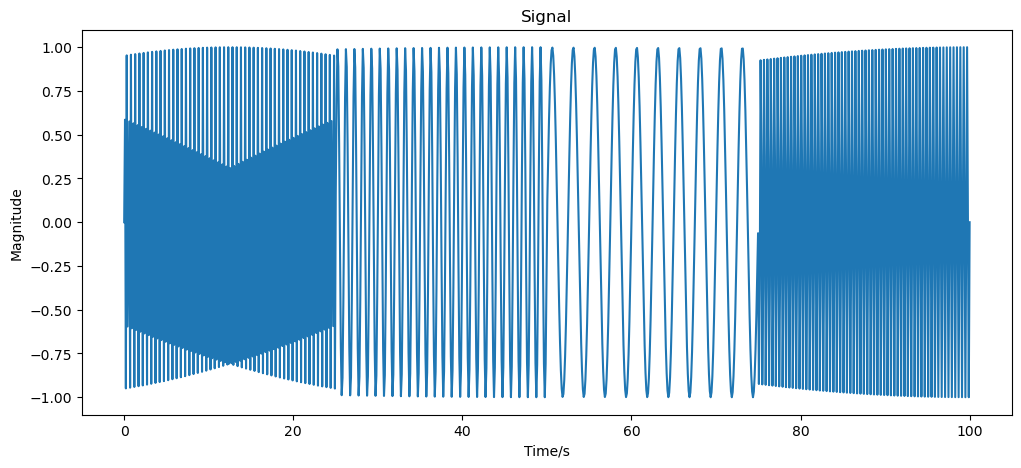

In [14]:
plt.figure(figsize=(12,5))
plt.plot(t, x_k)
plt.xlabel("Time/s")
plt.ylabel("Magnitude")
plt.title("Signal")
plt.show()

### Generate CWT Map

In [15]:
w0 = 32
wav = morlet((t_ - tau_)/s_, w0=w0)
Sxk = np.trapz(x_k*np.conjugate(wav), axis=2)/np.sqrt(s_[:,:,0])
print(Sxk.shape)


(100, 64)


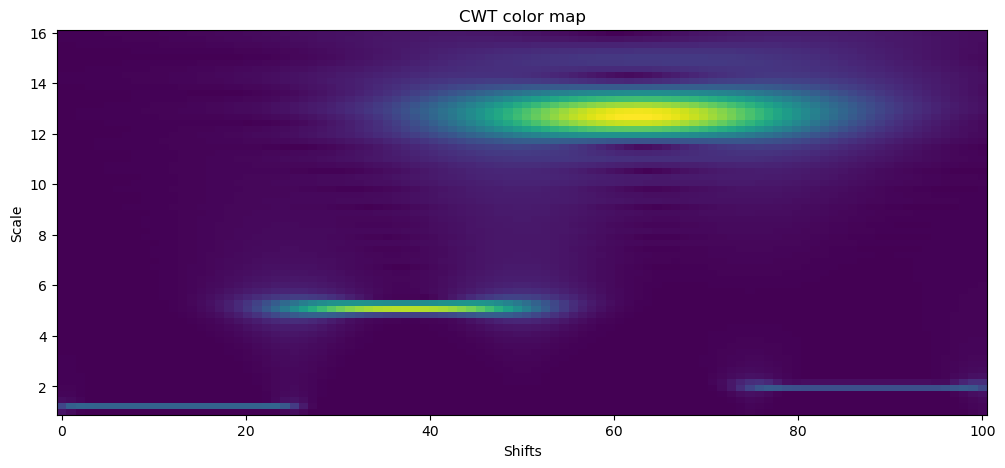

In [16]:
plt.figure(figsize=(12,5))
plt.title("CWT color map")
plt.pcolormesh(tau, s, np.abs(Sxk.T))
plt.xlabel("Shifts")
plt.ylabel("Scale")
plt.show()

In [17]:
print(f'Scale of f1 = {w0/(2*np.pi*f1)}')
print(f'Scale of f2 = {w0/(2*np.pi*f2)}')
print(f'Scale of f3 = {w0/(2*np.pi*f3)}')
print(f'Scale of f4 = {w0/(2*np.pi*f4)}')

Scale of f1 = 1.2732395447351628
Scale of f2 = 5.092958178940651
Scale of f3 = 12.732395447351628
Scale of f4 = 2.0371832715762603


Lower scales (Higher Frequencies) have better scale resolution ==> Poorer Frequency resolution, Better Time Resoltion

Higher scales (Lower Frequencies) have poorer scale resolution ==> Better Frequency Resolution, Poorer Time Resolution

## Chirp Signal

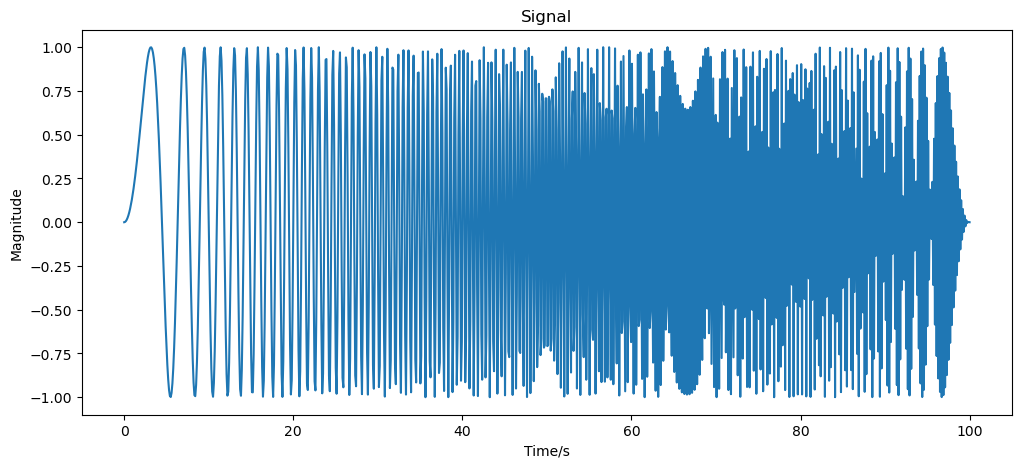

In [18]:
x_t = np.sin(2*np.pi*t*t/40)

plt.figure(figsize=(12,5))
plt.plot(t, x_t)
plt.xlabel("Time/s")
plt.ylabel("Magnitude")
plt.title("Signal")
plt.show()

### Generate CWT Map

In [19]:
w0 = 32
wav = morlet((t_ - tau_)/s_, w0=w0)
Sxx = np.trapz(x_t*np.conjugate(wav), axis=2)/np.sqrt(s_[:,:,0])
print(Sxx.shape)


(100, 64)


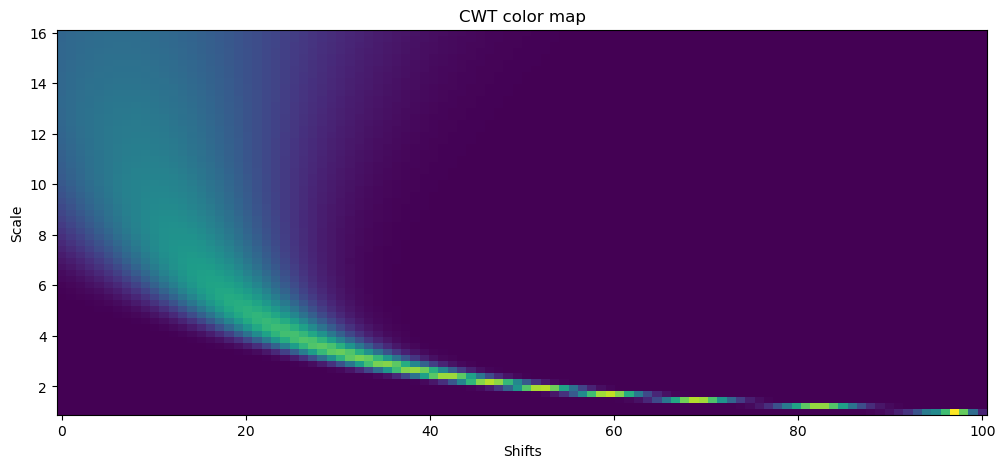

In [20]:
plt.figure(figsize=(12,5))
plt.title("CWT color map")
plt.pcolormesh(tau, s, np.abs(Sxx.T))
plt.xlabel("Shifts")
plt.ylabel("Scale")
plt.show()

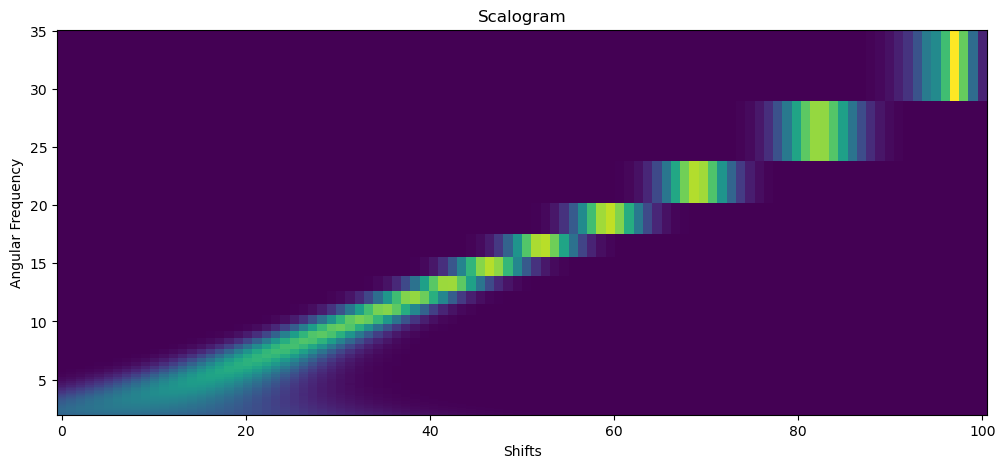

In [22]:
plt.figure(figsize=(12,5))
plt.title("Scalogram")
plt.pcolormesh(tau, w0/s, np.abs(Sxx.T))
plt.xlabel("Shifts")
plt.ylabel("Angular Frequency")
plt.show()